## Importar la base de datos, transformada en excel

In [1]:
import pandas as pd

#David M Path:  r"C:\Users\David\Universidad de los andes\David Stiven Romero Grajales - Trabajo de Grado\Trabajo de Grado 1\Base de datos y descripción\Entrenamiento_cronicas_N.pkl"
df_health = pd.read_excel(r'C:\Users\David\Universidad de los andes\David Stiven Romero Grajales - Trabajo de Grado\Trabajo de Grado 1\Base de datos y descripción\Entrenamiento_cronicas_N.xlsx')


Limpiemos nuestra base, y convirtamos todas las columnas a su respectiva categoria, pera entrenar nuestos modelos y algoritmos.

In [2]:

# 1. EPS - Categorical
df_health['EPS'] = df_health['EPS'].astype('category')

# 2. NUM_IDE - Identifier, string
df_health['NUM_IDE'] = df_health['NUM_IDE'].astype(str)

# 3. FECHA_NACI - Convert to datetime
df_health['FECHA_NACI'] = pd.to_datetime(df_health['FECHA_NACI'], errors='coerce')

# 4. SEXO - Categorical
df_health['SEXO'] = df_health['SEXO'].astype('category')

# 5. DPTO - Categorical
df_health['DPTO'] = df_health['DPTO'].astype('category')

# 6. MUNI - Categorical
df_health['MUNI'] = df_health['MUNI'].astype('category')

# 7. DIAS_COMP - Numeric
df_health['DIAS_COMP'] = pd.to_numeric(df_health['DIAS_COMP'], errors='coerce')

# 8. V8 - Categorical
df_health['V8'] = df_health['V8'].astype('category')

df_health['Valor_Neto'] = pd.to_numeric(df_health['Valor_Neto'], errors='coerce')

# 11. DIAS_ESTAN_Neto_Chunk and DIAS_ESTAN_Neto - Numeric
df_health['DIAS_ESTAN_Neto'] = pd.to_numeric(df_health['DIAS_ESTAN_Neto'], errors='coerce')

# 12. Edad - Numeric
df_health['Edad'] = pd.to_numeric(df_health['Edad'], errors='coerce')

# 13. Illness Columns - Numeric (binary)
illness_columns = [
    'SIDA_VIH', 'TUBERCULOSIS', 'CANCER_OTROSCANCER', 'CANCER_ORGANOSDIGESTIVOS', 
    'CANCER_ORGANOSRESPIRATORIOS', 'CANCER_MELANOMAYDELAPIEL', 'CANCER_MAMA', 
    'CANCER_OTROSGENITALESFEMENINOS', 'CANCER_CERVIXINVASIVO', 'CANCER_GENITALESMASCULINOS', 
    'CANCER_TEJIDOLINFATICOYAFINES', 'CANCER_CERVIXINSITU', 'AUTOINMUNE', 'DIABETES', 
    'SINDROMESCONVULSIVOS(EPILEPSIA)', 'ENFERMEDADCARDIOVASCULAR_OTRA', 
    'ENFERMEDADCARDIOVASCULAR_HIPERTENSION', 'ENFERMEDADPULMONARDELARGADURACION', 
    'ASMA', 'ARTRITISPIOGENASYREACTIVAS', 'ARTRITIS', 'ARTROSIS', 'RENAL_OTRA', 
    'RENAL_RENALDELARGADURACION', 'TRANSPLANTE', 'RENAL_INSUFICIENCIARENALOTRA', 
    'RENAL_INSUFICIENCIARENALCRONICA', 'ANOMALIASGENETICASYCONGENITAS', 
    'CANCER_TERAPIACANCER'
]

df_health[illness_columns] = df_health[illness_columns].apply(pd.to_numeric, errors='coerce')

# 14. Grupo_Edad - Categorical
df_health['Grupo_Edad'] = df_health['Grupo_Edad'].astype('category')

# 15. Zona - Categorical
df_health['Zona'] = df_health['Zona'].astype('category')
print(df_health.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996234 entries, 0 to 996233
Data columns (total 42 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   EPS                                    996234 non-null  category      
 1   NUM_IDE                                996234 non-null  object        
 2   FECHA_NACI                             996234 non-null  datetime64[ns]
 3   SEXO                                   996234 non-null  category      
 4   DPTO                                   996234 non-null  category      
 5   MUNI                                   996234 non-null  category      
 6   DIAS_COMP                              996234 non-null  int64         
 7   V8                                     996234 non-null  category      
 8   Valor_Neto                             996234 non-null  int64         
 9   DIAS_ESTAN_Neto                        996234 no

Ahora queremos ver un análisis de correlación de los datos, qué variables no tienen ninguna información relevante para nuestro módelo?

Valor_Neto                               1.000000
DIAS_ESTAN_Neto                          0.039998
ENFERMEDADCARDIOVASCULAR_HIPERTENSION    0.036712
ENFERMEDADCARDIOVASCULAR_OTRA            0.023683
DIABETES                                 0.023571
Edad                                     0.023390
ENFERMEDADPULMONARDELARGADURACION        0.021528
RENAL_INSUFICIENCIARENALCRONICA          0.020943
DIAS_COMP                                0.016189
ARTROSIS                                 0.013344
CANCER_OTROSCANCER                       0.011607
CANCER_ORGANOSDIGESTIVOS                 0.010927
RENAL_INSUFICIENCIARENALOTRA             0.010510
ARTRITIS                                 0.010473
CANCER_TEJIDOLINFATICOYAFINES            0.009233
CANCER_CERVIXINSITU                      0.008481
TRANSPLANTE                              0.008108
CANCER_MAMA                              0.007828
AUTOINMUNE                               0.007736
RENAL_OTRA                               0.007514


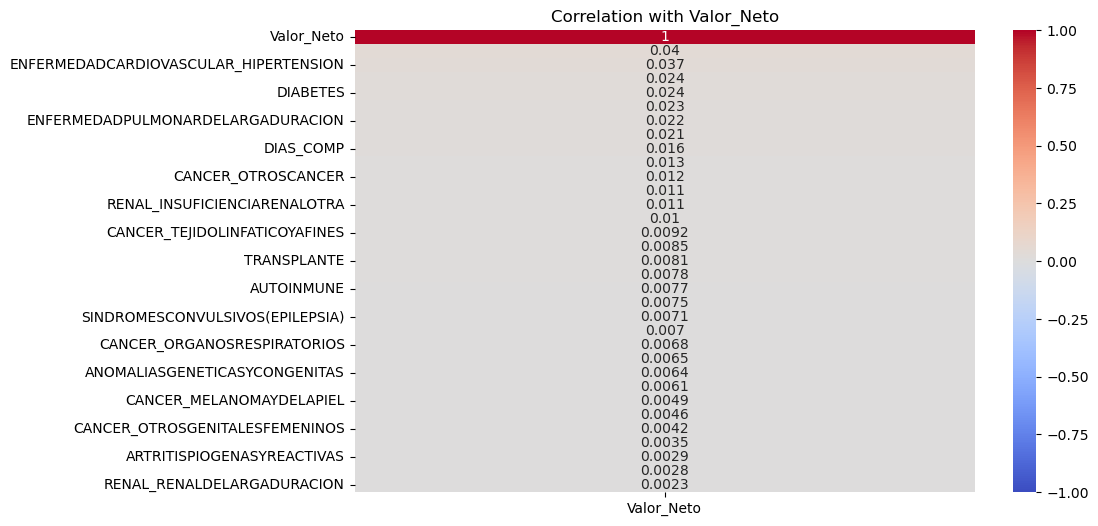

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting all numeric columns, including binary illness columns
illness_columns = [
    'SIDA_VIH', 'TUBERCULOSIS', 'CANCER_OTROSCANCER', 'CANCER_ORGANOSDIGESTIVOS', 
    'CANCER_ORGANOSRESPIRATORIOS', 'CANCER_MELANOMAYDELAPIEL', 'CANCER_MAMA', 
    'CANCER_OTROSGENITALESFEMENINOS', 'CANCER_CERVIXINVASIVO', 'CANCER_GENITALESMASCULINOS', 
    'CANCER_TEJIDOLINFATICOYAFINES', 'CANCER_CERVIXINSITU', 'AUTOINMUNE', 'DIABETES', 
    'SINDROMESCONVULSIVOS(EPILEPSIA)', 'ENFERMEDADCARDIOVASCULAR_OTRA', 
    'ENFERMEDADCARDIOVASCULAR_HIPERTENSION', 'ENFERMEDADPULMONARDELARGADURACION', 
    'ASMA', 'ARTRITISPIOGENASYREACTIVAS', 'ARTRITIS', 'ARTROSIS', 'RENAL_OTRA', 
    'RENAL_RENALDELARGADURACION', 'TRANSPLANTE', 'RENAL_INSUFICIENCIARENALOTRA', 
    'RENAL_INSUFICIENCIARENALCRONICA', 'ANOMALIASGENETICASYCONGENITAS', 
    'CANCER_TERAPIACANCER'
]

# Add other numeric variables of interest like 'Edad', 'DIAS_COMP', etc.
numeric_columns = ['Valor_Neto', 'Edad', 'DIAS_COMP', 'DIAS_ESTAN_Neto'] + illness_columns

# Filter only relevant numeric columns for analysis
df_numeric = df_health[numeric_columns]

# Calculate correlation only with 'Valor_Neto'
correlation_with_valor_neto = df_numeric.corr()['Valor_Neto'].sort_values(ascending=False)

# Display the correlations
print(correlation_with_valor_neto)

# Optionally, visualize the correlation with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_with_valor_neto.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True)
plt.title('Correlation with Valor_Neto')
plt.show()


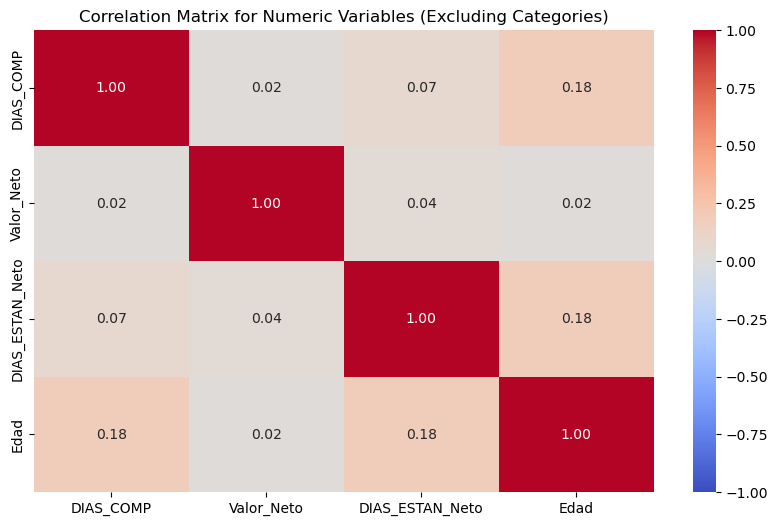

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the dataset has already been loaded as df_health
# Select only the numeric columns that are not categorical
numeric_columns = ['DIAS_COMP','Valor_Neto', 'DIAS_ESTAN_Neto', 'Edad']

# Calculate the correlation matrix for the specified numeric columns
correlation_matrix_numeric = df_health[numeric_columns].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_numeric, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Numeric Variables (Excluding Categories)')
plt.show()


Wee se that the variables are not so correlated, that is bad news because we want to have a correlation with Valor_Neto

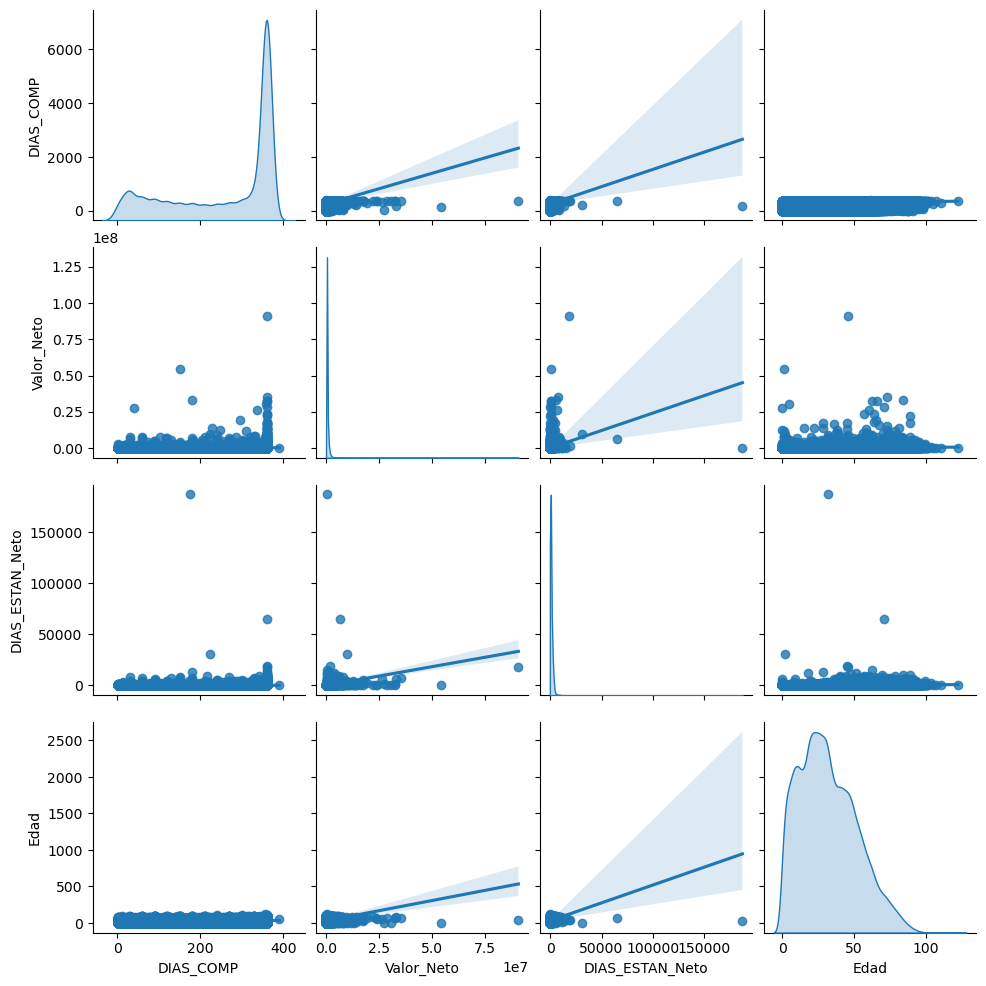

In [6]:
# Randomly sample 100,000 rows
df_sample = df_health[numeric_columns].sample(n=100000, random_state=42)

# Create the pairplot on the sampled data
sns.pairplot(df_sample, kind="reg", diag_kind="kde")
plt.show()


In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

numeric_columns = ['DIAS_COMP', 'DIAS_ESTAN_Neto', 'Edad']

model = LinearRegression()

for col in numeric_columns:
    X = df_health[[col]]  
    y = df_health['Valor_Neto']  
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    print(f'R² for {col}: {r2}')


R² for DIAS_COMP: 0.00026207309567338744
R² for DIAS_ESTAN_Neto: 0.001599841547789027
R² for Edad: 0.0005470810611043486


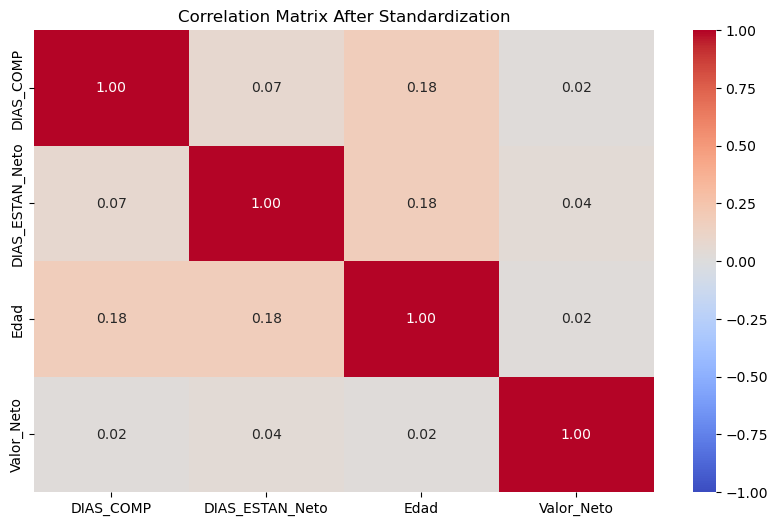

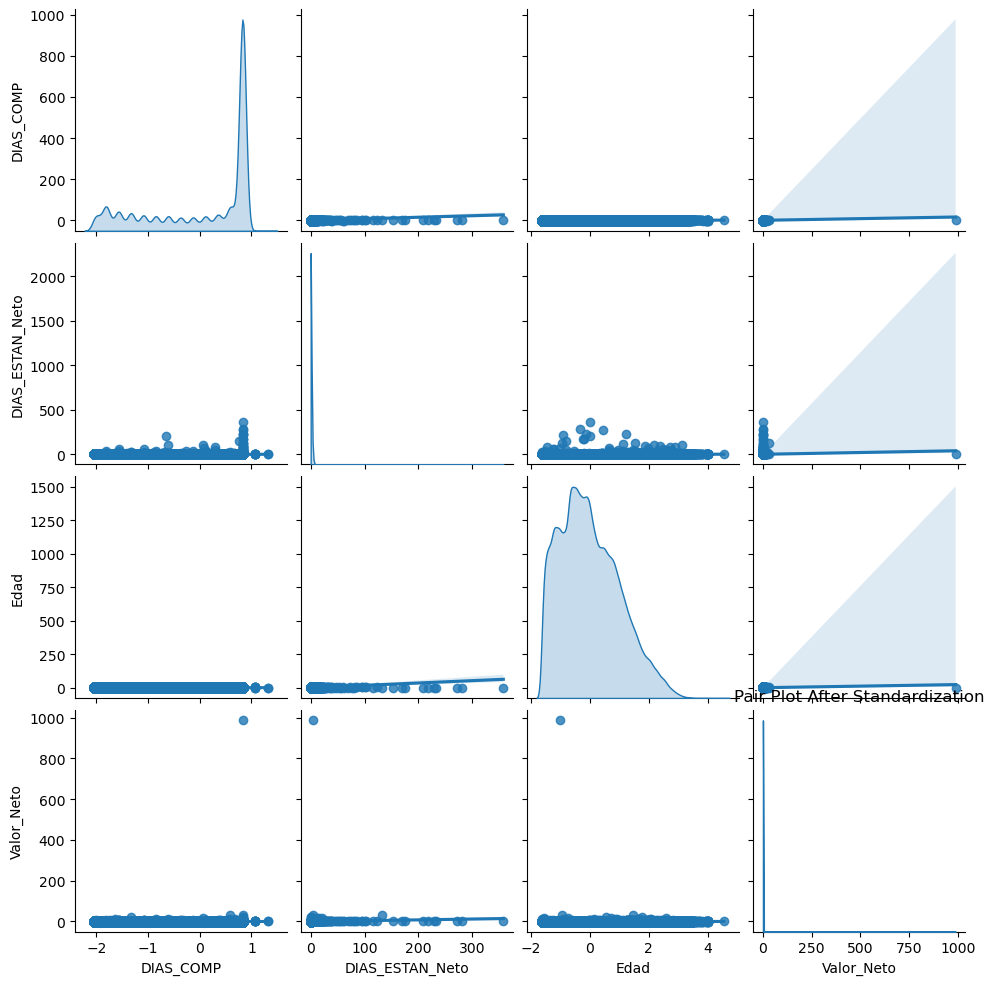

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Define the numeric columns to standardize
numeric_columns = ['DIAS_COMP', 'DIAS_ESTAN_Neto', 'Edad', 'Valor_Neto']

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it
df_health[numeric_columns] = scaler.fit_transform(df_health[numeric_columns])

# 1. Correlation Matrix after Standardization
correlation_matrix = df_health[numeric_columns].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix After Standardization')
plt.show()

# 2. Seaborn Pair Plot after Standardization
sns.pairplot(df_health[numeric_columns], kind='reg', diag_kind='kde')
plt.title('Pair Plot After Standardization')
plt.show()


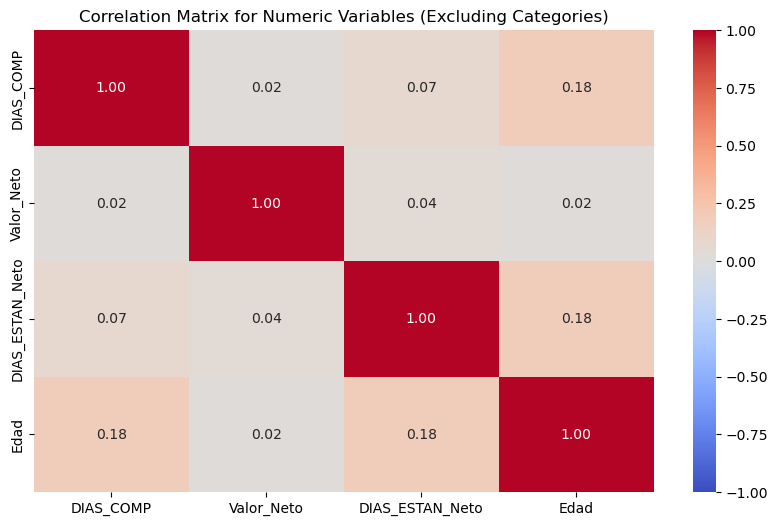

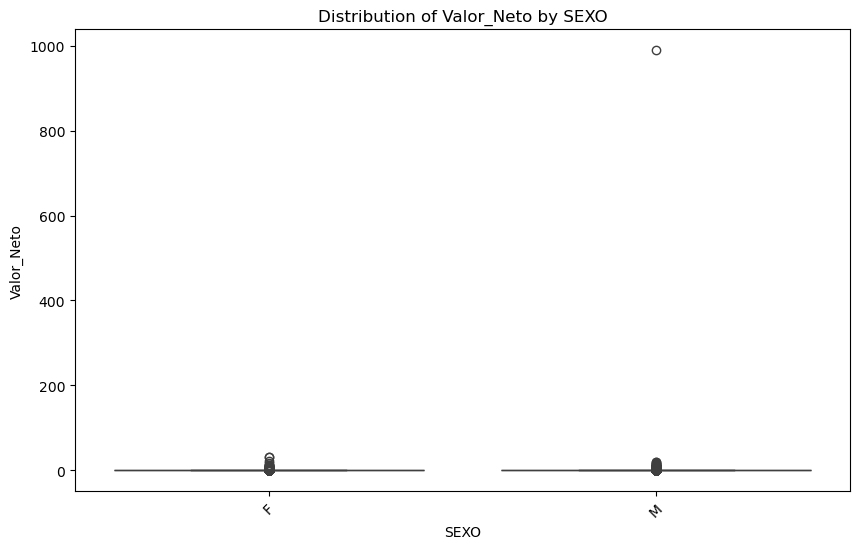

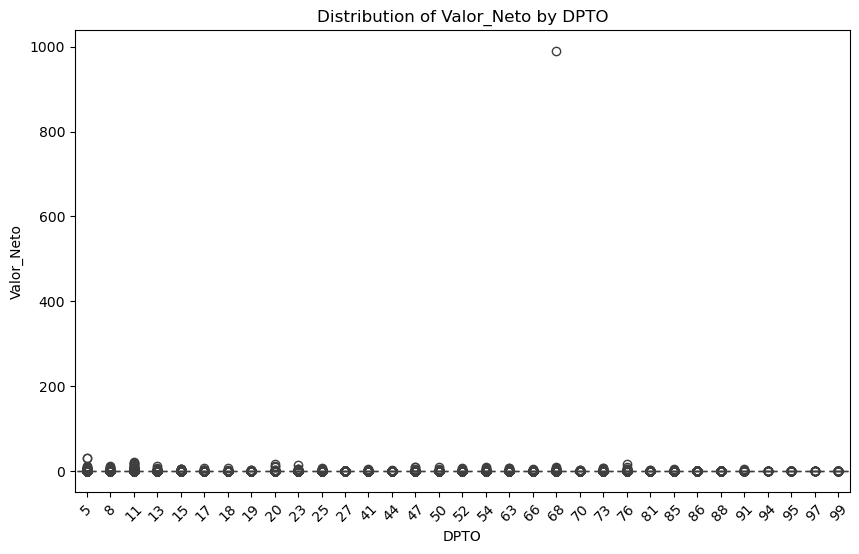

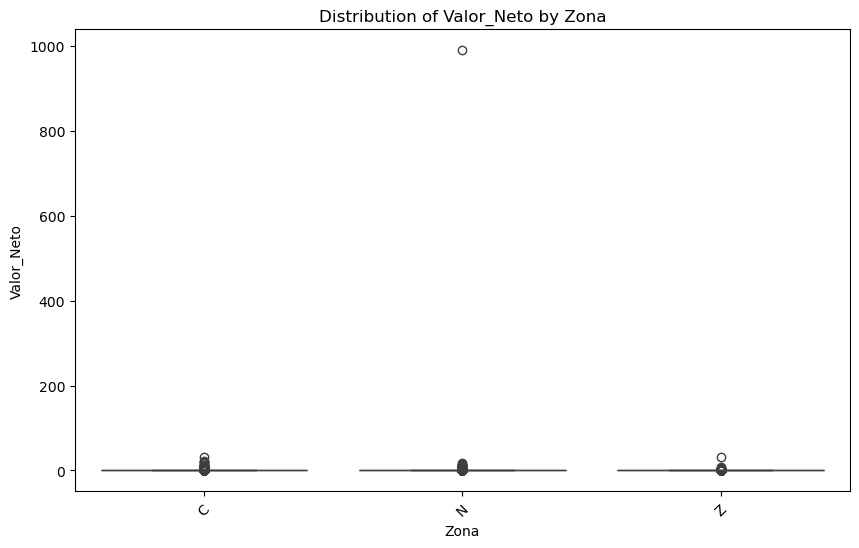

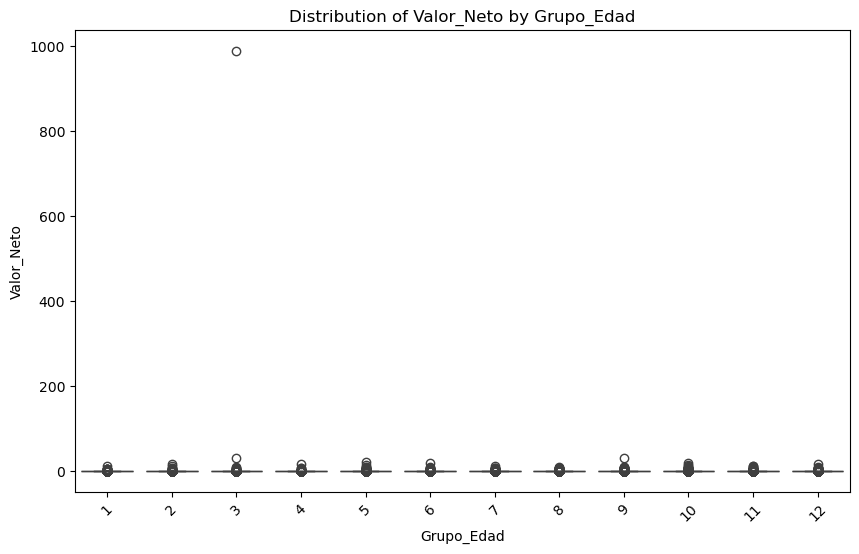

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical columns to explore
categorical_columns = ['SEXO', 'DPTO', 'Zona', 'Grupo_Edad']  # Add more relevant categorical columns

# Loop through categorical columns and plot boxplots for each
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='Valor_Neto', data=df_health)
    plt.title(f'Distribution of Valor_Neto by {col}')
    plt.xticks(rotation=45)  # Rotate the x-axis labels if needed
    plt.show()


In [19]:
df_health_clean = df_health.dropna(subset=['SEXO', 'DPTO', 'Zona', 'Grupo_Edad'])


In [20]:
from scipy import stats

# Loop through each categorical column and perform ANOVA
for col in categorical_columns:
    groups = [df_health_clean[df_health_clean[col] == category]['Valor_Neto'] for category in df_health_clean[col].unique()]
    f_stat, p_value = stats.f_oneway(*groups)
    print(f"ANOVA results for {col}: F-statistic = {f_stat}, p-value = {p_value}")


ANOVA results for SEXO: F-statistic = 70.35617753838353, p-value = 4.957084699204752e-17
ANOVA results for DPTO: F-statistic = 1.103416448310325, p-value = 0.314561603612956
ANOVA results for Zona: F-statistic = 3.568477888969616, p-value = 0.02819910310435455
ANOVA results for Grupo_Edad: F-statistic = 72.967035907799, p-value = 6.023447684437089e-165


R² score: 0.2433
Mean Absolute Error: 0.0267


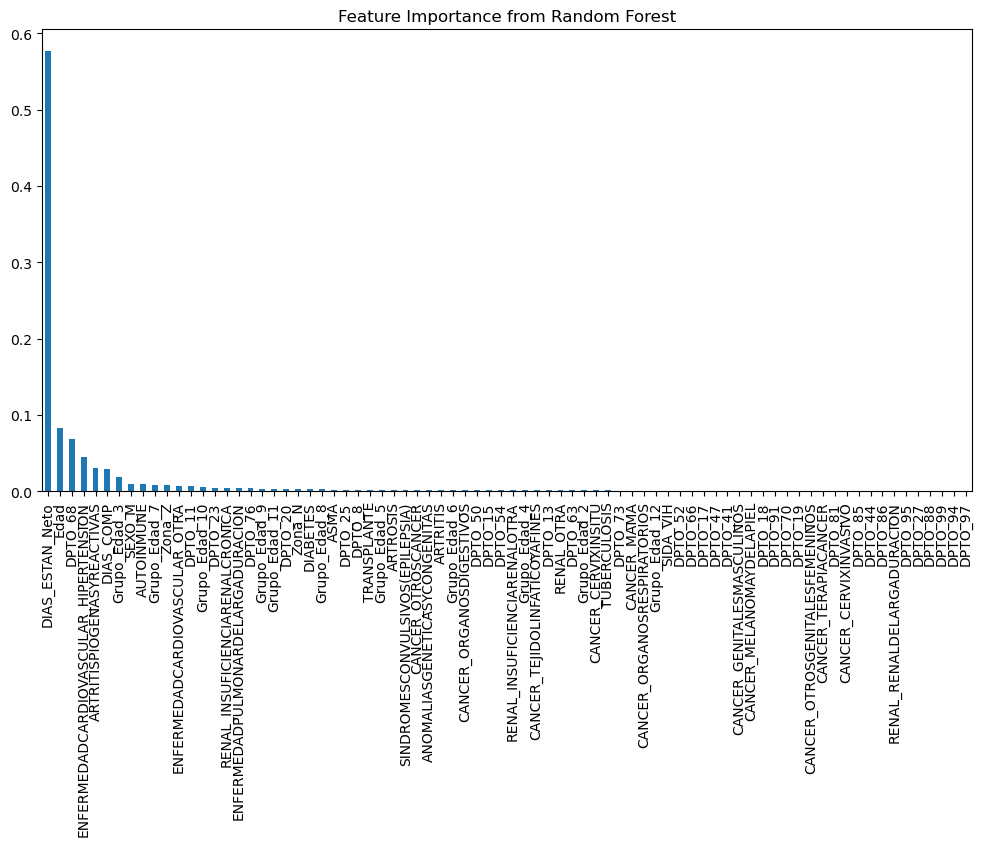

In [22]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# List of categorical, illness, and numeric columns
categorical_columns = ['SEXO', 'DPTO', 'Zona', 'Grupo_Edad']
illness_columns = ['SIDA_VIH', 'TUBERCULOSIS', 'CANCER_OTROSCANCER', 'CANCER_ORGANOSDIGESTIVOS', 
                   'CANCER_ORGANOSRESPIRATORIOS', 'CANCER_MELANOMAYDELAPIEL', 'CANCER_MAMA', 
                   'CANCER_OTROSGENITALESFEMENINOS', 'CANCER_CERVIXINVASIVO', 'CANCER_GENITALESMASCULINOS', 
                   'CANCER_TEJIDOLINFATICOYAFINES', 'CANCER_CERVIXINSITU', 'AUTOINMUNE', 'DIABETES', 
                   'SINDROMESCONVULSIVOS(EPILEPSIA)', 'ENFERMEDADCARDIOVASCULAR_OTRA', 'ENFERMEDADCARDIOVASCULAR_HIPERTENSION', 
                   'ENFERMEDADPULMONARDELARGADURACION', 'ASMA', 'ARTRITISPIOGENASYREACTIVAS', 'ARTRITIS', 'ARTROSIS', 
                   'RENAL_OTRA', 'RENAL_RENALDELARGADURACION', 'TRANSPLANTE', 'RENAL_INSUFICIENCIARENALOTRA', 
                   'RENAL_INSUFICIENCIARENALCRONICA', 'ANOMALIASGENETICASYCONGENITAS', 'CANCER_TERAPIACANCER']

numeric_columns = ['DIAS_COMP', 'DIAS_ESTAN_Neto', 'Edad']  # Numeric columns

# Combine all the columns you need
all_columns = categorical_columns + illness_columns + numeric_columns + ['Valor_Neto']  # Add 'Valor_Neto' as the target variable

# Select the relevant columns from your DataFrame
df_health_selected = df_health[all_columns]

# One-hot encode the categorical columns
df_health_encoded = pd.get_dummies(df_health_selected, columns=categorical_columns, drop_first=True)

# Prepare the data for the model
X = df_health_encoded.drop(columns=['Valor_Neto'])  # Features
y = df_health_encoded['Valor_Neto']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")

# Feature importance
importances = rf_model.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# Plot feature importance
feature_importance.plot(kind='bar', figsize=(12, 6))
plt.title('Feature Importance from Random Forest')
plt.show()
